In [1]:
import os
import sys
import h5py
import time
from pathlib import Path

sys.path.append('../')
from source.computation_support import *
from source.myGaborFunctions import *
from source.color_transformations import *

In [2]:
# Parameters and paths to images and features data sets
num_imgs = 25
num_cores = -1
hdf5_indir_im = Path('../../data/hdf5_datasets/'+str(num_imgs)+'images/' + 'images')
hdf5_indir_feat = Path('../../data/hdf5_datasets/'+str(num_imgs)+'images/' + 'features')
num_imgs_dir = str(num_imgs)+'images/'

In [3]:
# Reading the subset of 25 images of the BSD
print('Reading Berkeley image data set')
t0 = time.time()
# Read hdf5 file and extract its information
images_file = h5py.File(hdf5_indir_im / "Berkeley_images.h5", "r+")
image_vectors = np.array(images_file["/images"])
img_shapes = np.array(images_file["/image_shapes"])
img_ids = np.array(images_file["/image_ids"])
images = np.array(Parallel(n_jobs=num_cores)(delayed(np.reshape)(img, (shape[0], shape[1], shape[2])) for img, shape in zip(image_vectors, img_shapes)))
t1 = time.time()
print('Reading hdf5 image data set time: %.2fs' % (t1 - t0))

Reading Berkeley image data set
Reading hdf5 image data set time: 0.33s


In [4]:
# Reading all the precomputed Gabor responses
feat_dirs = sorted(os.listdir(hdf5_indir_feat))
features_input_dir = feat_dirs[1]
with h5py.File(hdf5_indir_feat / features_input_dir / 'Gabor_features.h5', "r+") as features_file:
    print('Reading Berkeley features data set')
    print('Gabor configuration: ', features_input_dir)
    t0 = time.time()
    feature_vectors = np.array(features_file["/gabor_features"])

    n_freq = features_file.attrs['num_freq']
    n_angles = features_file.attrs['num_angles']

    gabor_features_norm = Parallel(n_jobs=num_cores)(
        delayed(np.reshape)(features, (shape[0], shape[1], n_freq * n_angles, shape[2])) for features, shape in
        zip(feature_vectors, img_shapes))

    t1 = time.time()
    print('Reading hdf5 features data set time: %.2fs' % (t1 - t0))


Reading Berkeley features data set
Gabor configuration:  4f_4a_2p_25p_1.00fb_45ab_0.90cpf_0.90cpa_3.0stds
Reading hdf5 features data set time: 1.75s


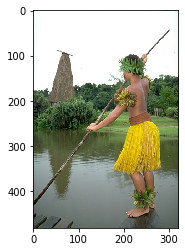

In [5]:
# Choose one image from the 25 images subdata set
indx_img = 24  # Index of the image
plt.imshow(images[indx_img])

g_responses_norm = gabor_features_norm[indx_img]

Text(0.5, 0.98, 'Luminance Gabor responses')

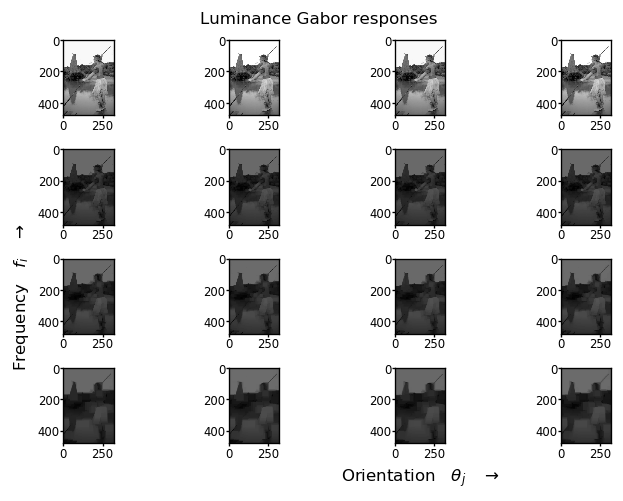

In [6]:
# Visualization of responses
# Luminance
fig, axes = plt.subplots(n_freq, n_angles, dpi=120)
ff = 0
for ii in range(n_freq):
    for jj in range(n_angles):
        axes[ii, jj].imshow(g_responses_norm[:, :, ff, 0], cmap='gray', vmax=g_responses_norm.max()) #, vmin=0., vmax=val_max
        axes[ii, jj].tick_params(axis='both', which='both', labelsize=7, pad=0.1, length=2)#, bottom=False, left=False, labelbottom=False, labelleft=False
        ff += 1
axes[n_freq-1, np.int(np.ceil(n_angles/2))].set_xlabel('Orientation   $\\theta_j $   $\\rightarrow$', fontsize=10)
axes[np.int(np.ceil(n_freq/2)), 0].set_ylabel('Frequency   $f_i$   $\\rightarrow$', fontsize=10)
fig.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.45, wspace=0.45)
fig.suptitle('Luminance Gabor responses', fontsize=10)

Text(0.5, 0.98, 'Chrominance Re Gabor responses')

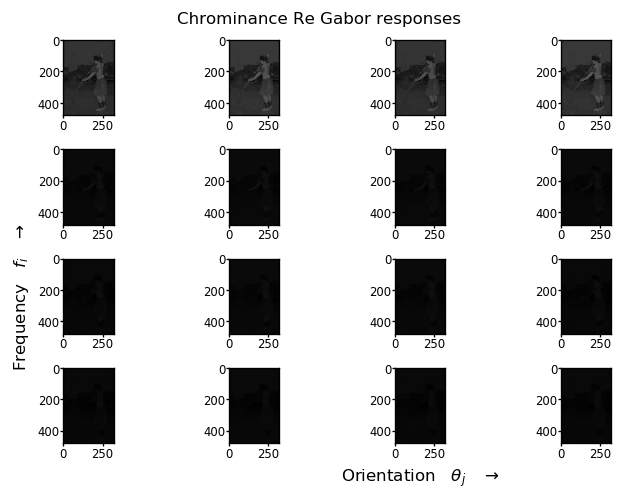

In [7]:
# Visualization of responses
# Chrominance Re
fig, axes = plt.subplots(n_freq, n_angles, dpi=120)
ff = 0
for ii in range(n_freq):
    for jj in range(n_angles):
        axes[ii, jj].imshow(g_responses_norm[:, :, ff, 1], cmap='gray', vmax=g_responses_norm.max()) #, vmin=0., vmax=val_max
        axes[ii, jj].tick_params(axis='both', which='both', labelsize=7, pad=0.1, length=2)#, bottom=False, left=False, labelbottom=False, labelleft=False
        ff += 1
axes[n_freq-1, np.int(np.ceil(n_angles/2))].set_xlabel('Orientation   $\\theta_j $   $\\rightarrow$', fontsize=10)
axes[np.int(np.ceil(n_freq/2)), 0].set_ylabel('Frequency   $f_i$   $\\rightarrow$', fontsize=10)
fig.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.45, wspace=0.45)
fig.suptitle('Chrominance Re Gabor responses', fontsize=10)

Text(0.5, 0.98, 'Chrominance Im Gabor responses')

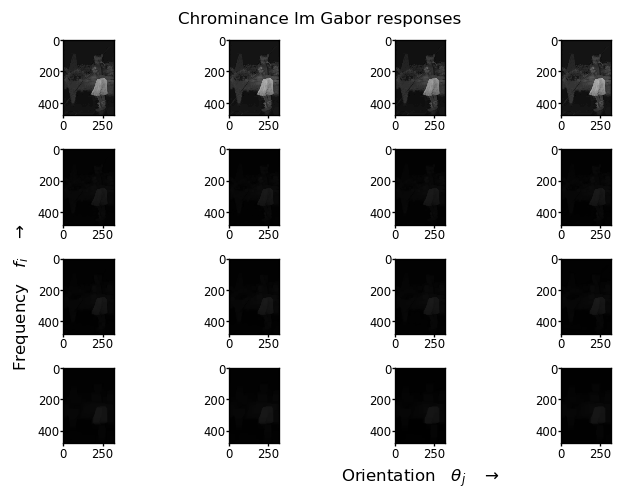

In [8]:
# Visualization of responses
# Chrominance Im
fig, axes = plt.subplots(n_freq, n_angles, dpi=120)
ff = 0
for ii in range(n_freq):
    for jj in range(n_angles):
        axes[ii, jj].imshow(g_responses_norm[:, :, ff, 2], cmap='gray', vmax=g_responses_norm.max()) #, vmin=0., vmax=val_max
        axes[ii, jj].tick_params(axis='both', which='both', labelsize=7, pad=0.1, length=2)#, bottom=False, left=False, labelbottom=False, labelleft=False
        ff += 1
axes[n_freq-1, np.int(np.ceil(n_angles/2))].set_xlabel('Orientation   $\\theta_j $   $\\rightarrow$', fontsize=10)
axes[np.int(np.ceil(n_freq/2)), 0].set_ylabel('Frequency   $f_i$   $\\rightarrow$', fontsize=10)
fig.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.45, wspace=0.45)
fig.suptitle('Chrominance Im Gabor responses', fontsize=10)